In [30]:
import pandas as pd

df = pd.read_csv('./data/SanDiegoWeather.csv')

# remove duplicate timepoints
df.drop_duplicates('dt', inplace=True)

# data from 2017 and beyond; selected columns only
df = df.loc[ df['dt'] >= 1483257600, ['dt','dt_iso','rain_1h', 'rain_3h'] ]
df.fillna(0,inplace=True)

# it appears that rain_3h values should actually be placed in column rain_1h 
# get max between 'rain_1h', 'rain_3h'
df['rain_1h'] = df[['rain_1h','rain_3h']].max(axis=1)

del df['rain_3h']

df.head()


,dt,dt_iso,rain_1h
27603,1483257600,2017-01-01 08:00:00 +0000 UTC,0.0
27605,1483261200,2017-01-01 09:00:00 +0000 UTC,0.0
27606,1483264800,2017-01-01 10:00:00 +0000 UTC,0.0
27607,1483268400,2017-01-01 11:00:00 +0000 UTC,0.0
27608,1483272000,2017-01-01 12:00:00 +0000 UTC,0.0


In [37]:
df['Month'] = [ s[0:7] for s in df['dt_iso'] ]
df.head()

,dt,dt_iso,rain_1h,Month
27603,1483257600,2017-01-01 08:00:00 +0000 UTC,0.0,2017-01
27605,1483261200,2017-01-01 09:00:00 +0000 UTC,0.0,2017-01
27606,1483264800,2017-01-01 10:00:00 +0000 UTC,0.0,2017-01
27607,1483268400,2017-01-01 11:00:00 +0000 UTC,0.0,2017-01
27608,1483272000,2017-01-01 12:00:00 +0000 UTC,0.0,2017-01


In [41]:
# get total rain by Month
gb = df.groupby('Month')['rain_1h'].sum()

df2 = pd.DataFrame(gb)
df2.rename(columns={'rain_1h':'Total Rain (mm)'}, inplace=True)
df2


,Total Rain (mm)
Month,
2017-01,7.420000
2017-02,138.844999
2017-03,0.000000
2017-04,0.000000
2017-05,0.000000
2017-06,0.000000
2017-07,0.000000
2017-08,0.000000
2017-09,0.000000


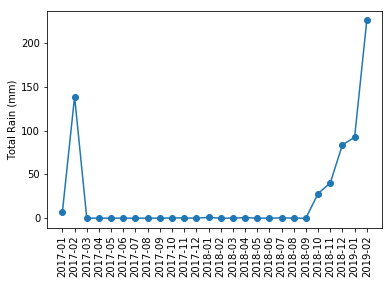

In [42]:
import matplotlib.pyplot as plt

x = list(range(len(df2)))
y = df2['Total Rain (mm)']
plt.plot(x,y,marker='o')
plt.ylabel('Total Rain (mm)')
labels = plt.xticks(x,df2.index, rotation='vertical')